In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Load the MNIST Fashion dataset
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

y_train = train_data.iloc[:, 0]  
x_train = train_data.iloc[:, 1:].values  
y_test = test_data.iloc[:, 0]  
x_test = test_data.iloc[:, 1:].values


In [14]:
import tensorflow as tf

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)



In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Train the model
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


313/313 [==============================] - 2s 6ms/step - loss: 0.3504 - accuracy: 0.8734
Test Loss: 0.3504221737384796
Test Accuracy: 0.8733999729156494


xtest =  [[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.01568627]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.00392157]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        

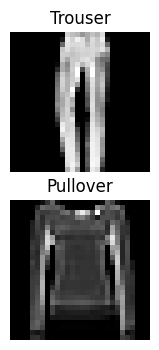

In [17]:
# Choose random images from the test dataset
num_images = 5
random_indices = np.random.choice(range(len(x_test)), num_images)

# Make predictions on the selected images
indices=[1,2]
print('xtest = ',x_test[:5])
predictions = model.predict(x_test[indices])
print('pred = ', predictions)
predicted_classes = np.argmax(predictions, axis=1)
print('predicted_classes = ',predicted_classes)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the images with their predicted classes
plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    print('idx = ',idx)
    print('i = ',i)
    plt.subplot(2, 1, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(class_labels[predicted_classes[i]])
    plt.axis('off')

plt.show()